In [ ]:
#@title Gerador de imagens 
import cv2 as cv
import numpy as np

# Define o tamanho da imagem
size = 400

# Cria a imagem com fundo preto
img = np.zeros((size, size, 3), dtype=np.uint8)

# Define o tamanho e a posição dos círculos brancos
radius = int(size / 12)
center1 = (int(size / 2), int(size / 2))
center2 = (int(size / 4), int(size / 4))
center3 = (int(size / 4), int(size * 3 / 4))
center4 = (int(size * 3 / 4), int(size / 4))
center5 = (int(size * 3 / 4), int(size * 3 / 4))
center6 = (int(size / 2), int(size / 4))

# Desenha os círculos brancos na imagem
cv.circle(img, center1, radius, (255, 255, 255), -1)
cv.circle(img, center2, radius, (255, 255, 255), -1)
cv.circle(img, center3, radius, (255, 255, 255), -1)
cv.circle(img, center4, radius, (255, 255, 255), -1)
cv.circle(img, center5, radius, (255, 255, 255), -1)
cv.circle(img, center6, radius, (255, 255, 255), -1)

# Salva cada face em um arquivo separado
for i in range(6):
    face = img.copy()
    angle = 60 * i
    M = cv.getRotationMatrix2D(center1, angle, 1.0)
    face = cv.warpAffine(face, M, (size, size))
    cv.imwrite("/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_{}.png".format(i+1), face)
print("Imagens criadas com Sucesso!")



Imagens criadas com Sucesso!


Imagens lidas com Sucesso!



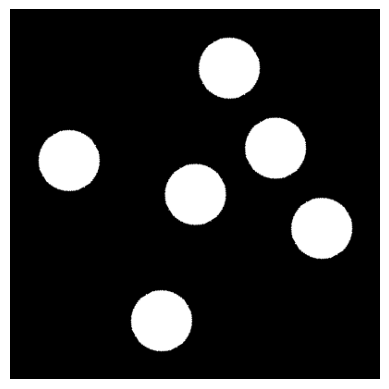

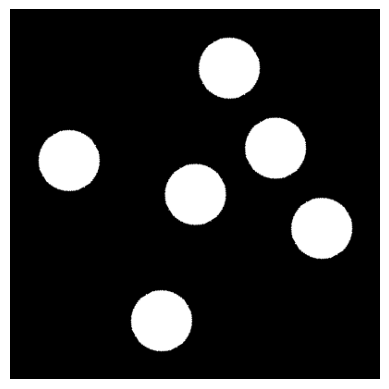

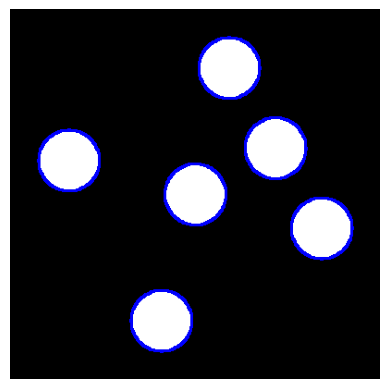

Peça rejeitada. Tipo R.


In [39]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Carrega a imagem as imagens
img1 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_1.png', 1)
img2 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_2.png', 1)
img3 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_3.png', 1)
img4 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_4.png', 1)
img5 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_5.png', 1)
img6 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_6.png', 1)
print("Imagens lidas com Sucesso!\n")

plt.imshow(img6)
plt.axis('off')
plt.show()

# Converte para escala de cinza
gray = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)

# Aplica o filtro Canny para detecção de bordas
edges = cv.Canny(gray, 100, 200)

# Encontra os contornos na imagem
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Desenha os contornos na imagem original
img_copy = img6.copy()
cv.drawContours(img_copy, contours, -1, (0, 0, 255), 2)

# Exibe a imagem original e a imagem com os contornos desenhados
plt.imshow(img6)
plt.axis('off')
plt.show()

plt.imshow(img_copy)
plt.axis('off')
plt.show()

# Classifica a peça de acordo com o número de contornos
num_contours = len(contours)
if num_contours == 6:
  print("Peça do tipo A.")
elif num_contours == 4:
  print("Peça do tipo B.")
elif num_contours == 2:
  print("Peça do tipo C.")
else:
  print("Peça rejeitada. Tipo R.")




In [51]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Leitura das imagens
img1 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_1.png', 1)
img2 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_2.png', 1)
img3 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_3.png', 1)
img4 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_4.png', 1)
img5 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_5.png', 1)
img6 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_6.png', 1)

# Conversão para escala de cinza
gray_imgs = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in [img1, img2, img3, img4, img5, img6]]

# Lista para armazenar as classificações das imagens
classificacoes = []

# Loop pelas imagens
for i, gray in enumerate(gray_imgs):
    # Aplica o filtro Canny para detecção de bordas
    edges = cv.Canny(gray, 100, 200)

    # Encontra os contornos na imagem
    contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Conta o número de contornos na imagem
    n_contours = len(contours)/2

    # Classifica a imagem de acordo com o número de contornos
    if n_contours == 6:
        classificacao = 'A'
    elif n_contours == 4:
        classificacao = 'B'
    elif n_contours == 2:
        classificacao = 'C'
    else:
        classificacao = 'R'

    # Adiciona a classificação à lista de classificações
    classificacoes.append(classificacao)

    # Exibe o resultado da classificação para a imagem atual
    print(f'Imagem {i+1} classificada como tipo {classificacao}')

# Exibe a lista completa de classificações
print(f'Classificações: {classificacoes}')


Imagem 1 classificada como tipo A
Imagem 2 classificada como tipo A
Imagem 3 classificada como tipo A
Imagem 4 classificada como tipo A
Imagem 5 classificada como tipo A
Imagem 6 classificada como tipo A
Classificações: ['A', 'A', 'A', 'A', 'A', 'A']


In [49]:
import cv2 as cv
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt

# Leitura das imagens
img1 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_1.png', 1)
img2 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_2.png', 1)
img3 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_3.png', 1)
img4 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_4.png', 1)
img5 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_5.png', 1)
img6 = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 3/Módulo 3A/face_6.png', 1)

# Conversão para escala de cinza
gray_imgs = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in [img1, img2, img3, img4, img5, img6]]

# Lista para armazenar as classificações das imagens
classificacoes = []

# Loop pelas imagens
for i, gray in enumerate(gray_imgs):
    # Aplica o filtro Canny para detecção de bordas
    edges = cv.Canny(gray, 100, 200)

    # Encontra os contornos na imagem
    contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Conta o número de contornos na imagem
    n_contours = len(contours)

    # Classifica a imagem de acordo com o número de contornos
    if n_contours == 6:
        classificacao = 'A'
    if n_contours == 4:
        classificacao = 'B'
    if n_contours == 2:
        classificacao = 'C'
    else:
        classificacao = 'R'

    # Adiciona a classificação à lista de classificações
    classificacoes.append(classificacao)

    # Exibe o resultado da classificação para a imagem atual
    print(f'Imagem {i+1} classificada como tipo {classificacao}')

# Exibe a lista completa de classificações
print(f'Classificações: {classificacoes}')


Imagem 1 classificada como tipo R
Imagem 2 classificada como tipo R
Imagem 3 classificada como tipo R
Imagem 4 classificada como tipo R
Imagem 5 classificada como tipo R
Imagem 6 classificada como tipo R
Classificações: ['R', 'R', 'R', 'R', 'R', 'R']
